# 1

Usando o Pagerank na famosa rede Zachary's Karate Club:

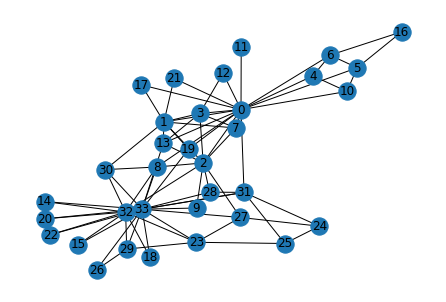

In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

G = nx.karate_club_graph() #carregando a rede

nx.draw(G, with_labels=True)
plt.show()

Cada nó representa um membro do clube de karatê, e as arestas são presentes quando os dois indivíduos conectados também interagiam fora do clube, podemos usar medidas simples para investigar a dinâmica dessa rede:

Node Degree - Node Degree
   0     16   17      2
   1      9   18      2
   2     10   19      3
   3      6   20      2
   4      3   21      2
   5      4   22      2
   6      4   23      5
   7      4   24      3
   8      5   25      3
   9      2   26      2
  10      3   27      4
  11      1   28      3
  12      2   29      4
  13      5   30      4
  14      2   31      6
  15      2   32     12
  16      2   33     17


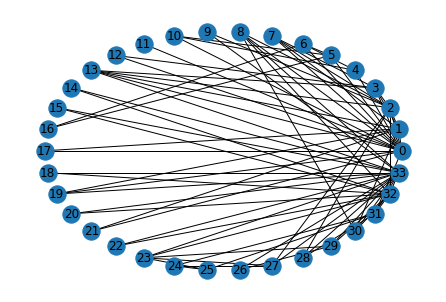

In [56]:
print("Node Degree - Node Degree")
nodes = list(G.nodes())  # Obter uma lista dos nós do grafo

for i in range(int(len(G)/2)):
    v = nodes[i]
    u = nodes[i+int(len(G)/2)]
    print(f"{v:4} {G.degree(v):6} {u:4} {G.degree(u):6}")
nx.draw_circular(G, with_labels=True)
plt.show()

Podemos ver que os nós 0,1,2,32,33 se destacam no quesito de ter o maior número de conexões, ou seja, esses são os membros do clube que participavam de mais interações fora dele, podemos ordenar esses nós pelo grau deles:

In [57]:
print("Node Degree - Node Degree")
nodes = list(G.nodes())  # Obter uma lista dos nós do grafo
nodes_degrees = [(node, G.degree(node)) for node in nodes]  # Lista de tuplas (nó, grau)

# Ordenar os nós com base no grau
sorted_nodes = sorted(nodes_degrees, key=lambda x: x[1], reverse=True)

for i in range(int(len(sorted_nodes)/2)):
    v, degree_v = sorted_nodes[i]
    u, degree_u = sorted_nodes[i+int(len(sorted_nodes)/2)]
    print(f"{v:4} {degree_v:6} {u:4} {degree_u:6}")


Node Degree - Node Degree
  33     17   10      3
   0     16   19      3
  32     12   24      3
   2     10   25      3
   1      9   28      3
   3      6    9      2
  31      6   12      2
   8      5   14      2
  13      5   15      2
  23      5   16      2
   5      4   17      2
   6      4   18      2
   7      4   20      2
  27      4   21      2
  29      4   22      2
  30      4   26      2
   4      3   11      1


In [58]:
node_labels = [node[0] for node in sorted_nodes]
print("Lista dos nós ordenada por grau:")
print(node_labels) 


Lista dos nós ordenada por grau:
[33, 0, 32, 2, 1, 3, 31, 8, 13, 23, 5, 6, 7, 27, 29, 30, 4, 10, 19, 24, 25, 28, 9, 12, 14, 15, 16, 17, 18, 20, 21, 22, 26, 11]


Podemos agora usar o Pagerank para obter uma nova ordenação dos nós dessa rede:

In [59]:
#calculando o pagerank:
pagerank = nx.pagerank(G)
print(pagerank)


{0: 0.09700181758983706, 1: 0.052878391037427, 2: 0.05707842304763673, 3: 0.035860643223064786, 4: 0.021979406974834498, 5: 0.02911334166344221, 6: 0.029113341663442205, 7: 0.02449075803950918, 8: 0.029765339186167028, 9: 0.014308950284462798, 10: 0.021979406974834494, 11: 0.009564916863537146, 12: 0.014645186487916188, 13: 0.02953631497720298, 14: 0.014535161524273824, 15: 0.014535161524273824, 16: 0.016785378110253487, 17: 0.01455885977424349, 18: 0.014535161524273824, 19: 0.01960441671193729, 20: 0.014535161524273824, 21: 0.01455885977424349, 22: 0.014535161524273824, 23: 0.03152091531163227, 24: 0.021075455001162945, 25: 0.02100562817474579, 26: 0.015043395360629753, 27: 0.025638803528350497, 28: 0.019572960509438537, 29: 0.026287262837112076, 30: 0.024589336534292478, 31: 0.037156635922679405, 32: 0.07169213006588289, 33: 0.1009179167487121}


In [60]:
# Ordenando os nós pelo pagerank:
sorted_nodes_pr = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)

# Obtendo apenas a lista dos nós ordenados
node_labels_pr = [node for node, rank in sorted_nodes]

# Imprimindo a lista dos nós
print("Lista dos nós ordenada pelo pagerank:")
print(node_labels_pr)

Lista dos nós ordenada pelo pagerank:
[33, 0, 32, 2, 1, 3, 31, 8, 13, 23, 5, 6, 7, 27, 29, 30, 4, 10, 19, 24, 25, 28, 9, 12, 14, 15, 16, 17, 18, 20, 21, 22, 26, 11]


In [61]:
print(node_labels)
print(node_labels_pr)

[33, 0, 32, 2, 1, 3, 31, 8, 13, 23, 5, 6, 7, 27, 29, 30, 4, 10, 19, 24, 25, 28, 9, 12, 14, 15, 16, 17, 18, 20, 21, 22, 26, 11]
[33, 0, 32, 2, 1, 3, 31, 8, 13, 23, 5, 6, 7, 27, 29, 30, 4, 10, 19, 24, 25, 28, 9, 12, 14, 15, 16, 17, 18, 20, 21, 22, 26, 11]


Nesse exemplo a ordenação pelo pagerank acabou sendo idêntica a ordenação puramente pelo grau de cada nó, é esperado que os nós com maior grau acabem tendo o pagerank também maior já que o pagerank busca uma medida de importância/relevância, e ter muitaas conexões implica essas duas coisas, apesar de abordagens bem diferentes na forma de olhar o quão importante cada nó é pra rede esses dois jeitos acabaram coincindindo perfeitamente nesse caso.

# 2

Agora analisaremos o seguinte torneio de Xadrez:

In [ ]:
tabela = '''
1 Tal        XXXX 0010 ==== 01=1 1111 1=11 111= 111=  20
2 Keres      1101 XXXX 0=== 1==0 0101 ==11 1110 1111  18.5 
3 Petrosian  ==== 1=== XXXX ==0= 11== 0==1 100= =11=  15.5 
4 Smyslov    10=0 0==1 ==1= XXXX ==10 0=10 =1=1 =011  15
5 Fischer    0000 1010 00== ==01 XXXX 10== 01=1 =1=1  12.5 
6 Gligoric   0=00 ==00 1==0 1=01 01== XXXX ==10 =1==  12.5 
7 Olafsson   000= 0001 011= =0=0 10=0 ==01 XXXX 00=1  10
8 Benko      000= 0000 =00= =100 =0=0 =0== 11=0 XXXX  8
'''

Cada jogador jogou um total de quatro partidas com todos os outros, os resultador da partida estão codificados nesses bloco de 4 caracteres, e já orgaznizados como se fosse uma matriz de adjacências, com cada bloca desses 4 caracteres mostrando os resultados das partidas, "1" significa vítória, "0" derrota e o "=" empate. Daí podemos montar a matriz de adjacências ponderada pelo número de partidas que o jogador A ganhou do jogador B.
Como queremos uma medida de importância, temos aquela idéia de que um site é importante quando tem vários outros sites apontando pra ele, nesse caso queremos dar mais relevância a vitória dos jogadores, então se o jogador A ganhou 3 partidas do jogador B, farmos um aresta saindo de B em direção a A com peso 3, Gerando o grafo:

In [111]:
# Valores fornecidos
matriz_adj = [
    [0, 1, 0, 3, 4, 3, 3, 3],
    [3, 0, 0, 1, 2, 2, 3, 4],
    [0, 1, 0, 0, 2, 1, 1, 2],
    [1, 1, 1, 0, 1, 1, 2, 2],
    [0, 2, 0, 1, 0, 1, 2, 2],
    [0, 0, 1, 2, 1, 0, 1, 1],
    [0, 1, 2, 0, 1, 1, 0, 1],
    [0, 0, 0, 1, 0, 0, 2, 0]
]

# Criar uma matriz NumPy com os valores
A = np.array(matriz_adj)
nomes_nos  = ['Tal', 'Keres', 'Petrosian', 'Smyslov', 'Fischer', 'Gligoric', 'Olafsson', 'Benko']

# Criar um grafo ponderado a partir da matriz de adjacência
G = nx.DiGraph()

# Adicionar nós ao grafo com os nomes fornecidos
for nome in nomes_nos:
    G.add_node(nome)

# Adicionar arestas direcionadas ponderadas ao grafo com base na matriz de adjacência
for i in range(len(matriz_adj)):
    for j in range(len(matriz_adj[i])):
        if matriz_adj[i][j] != 0:
            G.add_edge(nomes_nos[i], nomes_nos[j], weight=matriz_adj[i][j])


G = G.reverse()
# Visualizar o grafo
print("Nós do grafo:", G.nodes())
print("Arestas do grafo:", G.edges(data=True))

Nós do grafo: ['Tal', 'Keres', 'Petrosian', 'Smyslov', 'Fischer', 'Gligoric', 'Olafsson', 'Benko']
Arestas do grafo: [('Tal', 'Keres', {'weight': 3}), ('Tal', 'Smyslov', {'weight': 1}), ('Keres', 'Tal', {'weight': 1}), ('Keres', 'Petrosian', {'weight': 1}), ('Keres', 'Smyslov', {'weight': 1}), ('Keres', 'Fischer', {'weight': 2}), ('Keres', 'Olafsson', {'weight': 1}), ('Petrosian', 'Smyslov', {'weight': 1}), ('Petrosian', 'Gligoric', {'weight': 1}), ('Petrosian', 'Olafsson', {'weight': 2}), ('Smyslov', 'Tal', {'weight': 3}), ('Smyslov', 'Keres', {'weight': 1}), ('Smyslov', 'Fischer', {'weight': 1}), ('Smyslov', 'Gligoric', {'weight': 2}), ('Smyslov', 'Benko', {'weight': 1}), ('Fischer', 'Tal', {'weight': 4}), ('Fischer', 'Keres', {'weight': 2}), ('Fischer', 'Petrosian', {'weight': 2}), ('Fischer', 'Smyslov', {'weight': 1}), ('Fischer', 'Gligoric', {'weight': 1}), ('Fischer', 'Olafsson', {'weight': 1}), ('Gligoric', 'Tal', {'weight': 3}), ('Gligoric', 'Keres', {'weight': 2}), ('Gligoric'

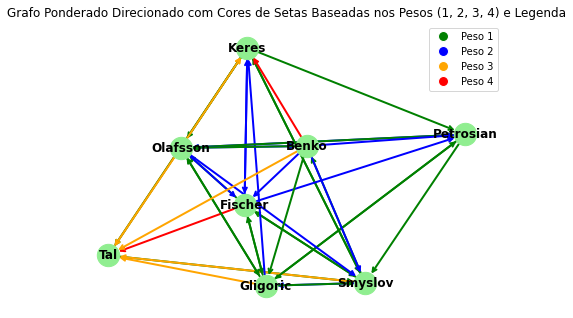

In [112]:
from matplotlib.lines import Line2D
pos = nx.spring_layout(G, seed=42)

# Obtendo os pesos das arestas
weights = [G[u][v]['weight'] for u, v in G.edges()]

# Mapeamento de cores para os diferentes valores de peso (1, 2, 3, 4)
color_map = {1: 'green', 2: 'blue', 3: 'orange', 4: 'red'}

# Lista de cores para as arestas
edge_colors = [color_map[weight] for weight in weights]

# Plot do grafo
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightgreen', font_weight='bold',
        arrows=True, width=2, edge_color=edge_colors, arrowstyle='->')

# Criação da legenda manual
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Peso 1'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Peso 2'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10, label='Peso 3'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Peso 4')
]

plt.legend(handles=legend_elements, loc='upper right')
plt.title("Grafo Ponderado Direcionado com Cores de Setas Baseadas nos Pesos (1, 2, 3, 4) e Legenda")
plt.show()

Agora que temos o grafo, podemos calcular o Pagerank dele:

In [113]:
# Calculate the PageRank
pagerank = nx.pagerank(G)

# Sort the nodes by PageRank
sorted_nodes_pr = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)

# Print the sorted nodes by PageRank
print("Nodes sorted by PageRank:")
for node, rank in sorted_nodes_pr:
    print(f"{node}: {rank}")


Nodes sorted by PageRank:
Keres: 0.21793100725521286
Tal: 0.185551367429238
Smyslov: 0.14394927486313353
Fischer: 0.1223995995388043
Olafsson: 0.10761284655621013
Petrosian: 0.08861337482285828
Gligoric: 0.08683070235073606
Benko: 0.04711182718380673


Se compararmos essa ordem e a classificação final do torneio:

In [127]:
max_length_pr = max(len(str(pr[0])) for pr in sorted_nodes_pr)
# Encontrar o comprimento máximo dos nomes dos nós para alinhar corretamente
max_length_node = max(len(nome) for nome in nomes_nos)
print("Pagerank    Classificação")
print("---------   -------------")
# Imprimir as duas listas alinhadas à esquerda
for node_pr, node_name in zip(sorted_nodes_pr, nomes_nos):
    # Formatando as colunas com espaços para alinhamento à esquerda
    print(f"{str(node_pr[0]):<{max_length_pr}}   {node_name:<{max_length_node}}")


Pagerank    Classificação
---------   -------------
Keres       Tal      
Tal         Keres    
Smyslov     Petrosian
Fischer     Smyslov  
Olafsson    Fischer  
Petrosian   Gligoric 
Gligoric    Olafsson 
Benko       Benko    


Nesse caso a ordem retornada pelo Pagerank foi consideravelmente diferente da classificação final do torneio, o jogador Keres que terminou em segundo, sobre pra primeiro ao analisar o pagerank, uma explicação pra esse ocorrido é o fato do Keres ter vencido o Tal nas partidas que aconteceram entre si, e boa parte das vitorias do Tal terem sido contra jogadores que ficaram na parte de baixo do tabela, então essas vitórias são cruciais pra deixá-lo na frente ao contar só os pontos, porém como o pagerank olha esse aspecto da qualidade dessas vitórias acabamos tendo esse fenômeno. O mesmo acontece com o jogador Petrosian, que ficou em terceiro no torneio, porém nenhuma de suas vitórias foram contra jogadores que acabaram na parte de cima da tabela e a classificação com o Pagerank é capaz de notar isso e por isso ele cai de 3° para 6°

# 3

Por fim utilizaremos uma base de dados que armazena informações sobre milhares de heróis dos quadrinhos marvel, informações pessoais dos heróis, edições em que eles apreceram, e temos uma lista de todos os pares de herois que já apareceram juntos em alguma edição, essa lista pode ser vista como uma lista de arestas e a partir dela podemos montar uma rede cujos nós são todos os heróis e as arestas mostram que esses dois heróis já apareceram juntos em alguma história.

In [15]:
adjacency_list = pd.read_csv('archive/hero-network.csv')
adjacency_list

,hero1,hero2
0,"LITTLE, ABNER",PRINCESS ZANDA
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
2,BLACK PANTHER/T'CHAL,PRINCESS ZANDA
3,"LITTLE, ABNER",PRINCESS ZANDA
4,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
...,...,...
574462,COLOSSUS II/PETER RA,CALLISTO
574463,CALLISTO,ROGUE /
574464,CALLISTO,CALIBAN/
574465,CALIBAN/,ROGUE /


In [16]:
#construindo o grafo
for index, row in edges.iterrows():
    source = row['hero1']
    target = row['hero2']
    # Adiciona a aresta com seu peso (se aplicável)
    G.add_edge(source, target)

In [18]:
# Calculate the PageRank
pagerank = nx.pagerank(G)

# Sort the nodes by PageRank
sorted_nodes_pr = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)

# Print the sorted nodes by PageRank
print("Nodes sorted by PageRank:")
for node, rank in sorted_nodes_pr:
    print(f"{node}: {rank}")


Nodes sorted by PageRank:
SPIDER-MAN/PETER PAR: 0.005294712764726965
CAPTAIN AMERICA: 0.005092026855056967
IRON MAN/TONY STARK : 0.0040874944829243495
WOLVERINE/LOGAN : 0.003850030508485309
THING/BENJAMIN J. GR: 0.003654528782685924
MR. FANTASTIC/REED R: 0.0035520050567531096
HUMAN TORCH/JOHNNY S: 0.003481167069506167
SCARLET WITCH/WANDA : 0.0031960452426798825
THOR/DR. DONALD BLAK: 0.0031829418985508157
BEAST/HENRY &HANK& P: 0.0031680842725620136
INVISIBLE WOMAN/SUE : 0.00310743677719256
HAWK: 0.003041808589591598
DR. STRANGE/STEPHEN : 0.003022176014773217
HULK/DR. ROBERT BRUC: 0.0030005448437950906
VISION : 0.0028844538663606403
DAREDEVIL/MATT MURDO: 0.0028060700745524115
ANT-MAN/DR. HENRY J.: 0.002636086135662916
JAMESON, J. JONAH: 0.0026335428834726986
WASP/JANET VAN DYNE : 0.0026263746489545627
SHE-HULK/JENNIFER WA: 0.0025992920273605964
FURY, COL. NICHOLAS : 0.002593501462439658
CYCLOPS/SCOTT SUMMER: 0.0025807210252160747
ANGEL/WARREN KENNETH: 0.0025657026389002096
STORM/ORORO MU

Chegamos nessa ordenação dos heróis pelo Pagerank, podemos usar o resto da base de dados, e olhar pra quantidade absoluta de edições que cada herói apareceu:

In [38]:
edges = pd.read_csv('archive/edges.csv') #csv com duas colunas, uma o nome do heroi e na outra uma edição em que ele aparece

In [47]:
comics_per_hero = edges['hero'].value_counts()

# Exibindo o número de quadrinhos por herói
print(comics_per_hero)

SPIDER-MAN/PETER PARKER    1577
CAPTAIN AMERICA            1334
IRON MAN/TONY STARK        1150
THING/BENJAMIN J. GR        963
THOR/DR. DONALD BLAK        956
                           ... 
PROGENITOR                    1
DOMANI, DINO                  1
DOGGEREL                      1
DOCTOR, DR. JOSHUA            1
24-HOUR MAN/EMMANUEL          1
Name: hero, Length: 6439, dtype: int64


In [74]:
comics_per_hero.head(11).index


Index(['SPIDER-MAN/PETER PARKER', 'CAPTAIN AMERICA', 'IRON MAN/TONY STARK',
       'THING/BENJAMIN J. GR', 'THOR/DR. DONALD BLAK', 'HUMAN TORCH/JOHNNY S',
       'MR. FANTASTIC/REED R', 'HULK/DR. ROBERT BRUC', 'WOLVERINE/LOGAN',
       'INVISIBLE WOMAN/SUE', 'SCARLET WITCH/WANDA'],
      dtype='object')

Pegando os 10 primeiros de ambas as listas para comparar:

In [71]:
# Get the first 10 heroes from the sorted nodes by PageRank
top_10_heroes_pr = [node for node, rank in sorted_nodes_pr[:10]]
top_10_heroes_ne = comics_per_hero.head(10).index
# Print the first 10 heroes
print("por Pagerank              por Número de Quadrinhos")
print("-------------             -----------------------")
lista1 = top_10_heroes_pr
lista2 = top_10_heroes_ne
max_length1 = max(len(item) for item in lista1)
max_length2 = max(len(item) for item in lista2)

# Iterando sobre as listas e imprimindo os elementos alinhados
for item1, item2 in zip(lista1, lista2):
    print(f"{item1.ljust(max_length1)}      {item2.ljust(max_length2)}")

por Pagerank              por Número de Quadrinhos
-------------             -----------------------
SPIDER-MAN/PETER PAR      SPIDER-MAN/PETER PARKER
CAPTAIN AMERICA           CAPTAIN AMERICA        
IRON MAN/TONY STARK       IRON MAN/TONY STARK    
WOLVERINE/LOGAN           THING/BENJAMIN J. GR   
THING/BENJAMIN J. GR      THOR/DR. DONALD BLAK   
MR. FANTASTIC/REED R      HUMAN TORCH/JOHNNY S   
HUMAN TORCH/JOHNNY S      MR. FANTASTIC/REED R   
SCARLET WITCH/WANDA       HULK/DR. ROBERT BRUC   
THOR/DR. DONALD BLAK      WOLVERINE/LOGAN        
BEAST/HENRY &HANK& P      INVISIBLE WOMAN/SUE    


Aqui vemos uma mistura dos casos anterioes, os 3 primeiros colocados são os mesmo olhando tanto pro Pagerank quanto pro número de edições que o heroi apareceu, porém o Wolverine apesar de aparecer em menos edições que o Coisa,que o Thor e etc, acaba ficando acima deles no critério do Pagerank o que mostra que as interações dele acabam compensando essa diferença na quantidade de edições. Outro caso interessante é o da Feiticeira Ecarlate que não aparece no top 10 no quesito número de quadrinhos, mas ela sobe pra 8 ao ordenar pelo Pagerank.